# "Data Analysis: Developer 101 | A Step Forward with Flutter"
> "A Crisp analysis over available data from students registrations and attendees information from GoToMeeting"

- toc: true 
- badges: true
- comments: true
- categories: [EDA]
- comments: true
- author: Teja Kummarikuntla

# Developer 101 | A Step Forward with Flutter
The following notebook is an analysis of an online webinar organised by [Sathyabama Coding Club](https://sites.google.com/view/sathyabamacodingclub)
- The data used here is private

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
reg_data = pd.read_excel("Developer 101 _ A step Forward with Flutter (Responses) (1).xlsx")
ui_data = pd.read_excel("Developer 101 _ A Step Forward with Flutter Attendees_Cleanded_data.xls")

In [87]:
SESSION_DURATION = ui_data['Time in Session (minutes)'].max()
print("Session Duration in Minutes: ", SESSION_DURATION)

Session Duration in Minutes:  125


## Analysis on Registration Data

## Univariate Analysis

In [84]:
no_of_regs = len(reg_data)
REG_COUNT = no_of_regs
print("No of Registrations : ", REG_COUNT)

No of Registrations :  73


### Observation:
No of registrations: **73**

In [10]:
reg_data.Batch.value_counts()

2022            27
2021            22
2023            13
Professional    11
Name: Batch, dtype: int64

Text(0.5, 1.0, 'Barplot on Academic year participation')

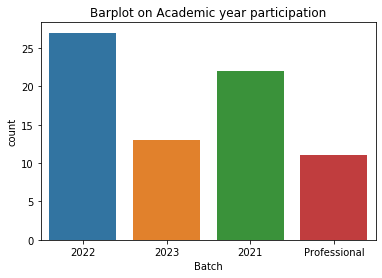

In [12]:
sns.countplot(x="Batch", data=reg_data)
plt.title("Barplot on Academic year participation")

### Observation
Students from 2022 are higher than 2021 and 2023
    - 2022 >> 2021 >> 2023 > Professional 

Text(0.5, 1.0, 'Barplot over the background of participants in web/mobile app devlopment')

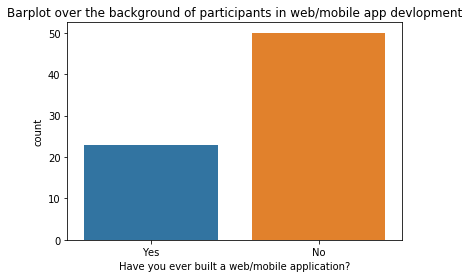

In [29]:
sns.countplot(x="Have you ever built a web/mobile application?", data=reg_data)
plt.title("Barplot over the background of participants in web/mobile app devlopment")

In [24]:
web_mob_yes = reg_data["Have you ever built a web/mobile application?"].value_counts()[1]
web_mob_no = reg_data["Have you ever built a web/mobile application?"].value_counts()[0]
print("The percentage of people joined the webinar who has prior exprience on Web/Android Dev :", 
      (web_mob_yes/no_of_regs)*100)
print("The percentage of people joined the webinar who has no prior exprience on Web/Android Dev :", 
      (web_mob_no/no_of_regs)*100)

The percentage of people joined the webinar who has prior exprience on Web/Android Dev : 31.506849315068493
The percentage of people joined the webinar who has no prior exprience on Web/Android Dev : 68.4931506849315


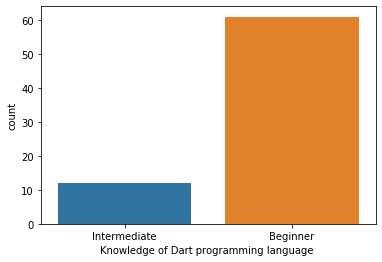

In [31]:
sns.countplot(x="Knowledge of Dart programming language ", 
              data=reg_data)

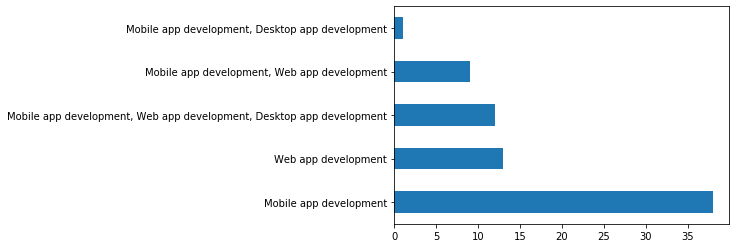

In [42]:
reg_data["Where do you wish to use Flutter?"].value_counts().plot(kind='barh')

**Observation:**
- Majority of the participants Wished for Learning Flutter for Mobile App Development

## Analysis on Attendes data

In [43]:
ui_data.head()

Name                Email Address Join Time Leave Time  \
0                AJ                          NaN   7:33 AM    8:16 AM   
1                AJ                          NaN   7:30 AM    7:32 AM   
2                AJ                          NaN   8:28 AM    9:13 AM   
3  ANKITKUMAR SINGH        ankitk.as51@gmail.com   7:27 AM    7:43 AM   
4                AR  aniket.rahalkar99@gmail.com   7:36 AM    7:39 AM   

   Time in Session (minutes)  
0                         43  
1                          1  
2                         44  
3                         15  
4                          3

In [44]:
ATTENDEES_COUNT = len(ui_data['Name'].value_counts())
ATTENDEES_COUNT

45

### Observation
Number of attendees without duplicates: **45**

In [47]:
len(ui_data.groupby(by=ui_data.Name, axis=1).sum())

58

In [48]:
ui_data.groupby(['Name', 'Time in Session (minutes)']).sum().iloc[:,:0]

Empty DataFrame
Columns: []
Index: [(AJ, 1), (AJ, 43), (AJ, 44), (ANKITKUMAR SINGH, 15), (AR, 3), (Abdultaiyeb Chechatwala, 0), (Abhiram, 40), (Abhiram, 52), (Abhishek Kumar, 104), (Aditya VijayKumar Singh, 31), (Aishwarya Pangarikar, 81), (Akash M, 100), (Antariksh Pratham, 98), (Athul, 0), (Athul, 42), (Ayush Shekhar, 24), (Ayush Shekhar, 85), (Ayush Sonare Ayush Sonare, 38), (Deepshikha, 37), (Dewashish Kumar, 81), (Dewashish kumar, 23), (HAMID HUSSAIN, 66), (JISS JOHNSON, 0), (Jiss Johnson, 5), (Jiss Johnson, 98), (Madallapalli sushanth, 23), (Maithili, 3), (Maithili, 95), (Mohit Kumar Patnaik, 105), (Mugunthan, 1), (Neha Rathi Neha Rathi, 1), (PALAKULA SAI TARUN, 92), (Psyco, 19), (Rohit, 4), (Rohit, 105), (Sanjana Birari, 3), (Sasank, 59), (Sonal Agrawal, 16), (Sonal Agrawal, 51), (Sriram Krishna, 123), (Suchismita Chakraborti, 120), (Surya Deepta Mazumdar, 24), (Surya Deepta Mazumdar, 38), (Swarnima Shishodia, 12), (Swarnima Shishodia, 78), (Teja Kummarikuntla, 125), (Vaibhav Mishra, 64), (Vaibhavkondabathini, 0), (You Know Who I Am, 111), (Zubair, 9), (Zubair, 11), (dhruv, 72), (kuro, 59), (neeraj jayaram, 3), (neeraj jayaram, 104), (reconnecting...., 111), (soundharya, 86), (tanvi tanvi, 42)]

In [49]:
(ui_data['Time in Session (minutes)'] == ui_data['Time in Session (minutes)'].iloc[0]).all()

False

In [50]:
def time_agg(group_series):
    if (group_series==group_series.iloc[0]).all():
        return group_series.iloc[0]
    else:
        return group_series.sum()

In [51]:
ui_data.groupby('Name', as_index=False).agg(time_agg)[['Name', 'Join Time', 'Leave Time', 'Time in Session (minutes)']]

Name              Join Time             Leave Time  \
0                          AJ  7:33 AM7:30 AM8:28 AM  8:16 AM7:32 AM9:13 AM   
1            ANKITKUMAR SINGH                7:27 AM                7:43 AM   
2                          AR                7:36 AM                7:39 AM   
3     Abdultaiyeb Chechatwala                7:27 AM                7:28 AM   
4                     Abhiram         7:30 AM8:20 AM         8:10 AM9:13 AM   
5              Abhishek Kumar                7:28 AM                9:13 AM   
6     Aditya VijayKumar Singh                7:27 AM                7:59 AM   
7        Aishwarya Pangarikar                7:36 AM                8:57 AM   
8                     Akash M                7:26 AM                9:07 AM   
9           Antariksh Pratham                7:07 AM                8:46 AM   
10                      Athul         8:30 AM7:47 AM         8:31 AM8:30 AM   
11              Ayush Shekhar         7:23 AM7:47 AM         7:47 AM9:13 AM   
12  Ayush Sonare Ayush Sonare                8:31 AM                9:10 AM   
13                 Deepshikha                7:56 AM                8:33 AM   
14            Dewashish Kumar                7:52 AM                9:13 AM   
15            Dewashish kumar                7:29 AM                7:52 AM   
16              HAMID HUSSAIN                7:26 AM                8:32 AM   
17               JISS JOHNSON                7:32 AM                7:33 AM   
18               Jiss Johnson         7:30 AM7:34 AM         7:36 AM9:12 AM   
19      Madallapalli sushanth                7:29 AM                7:53 AM   
20                   Maithili         7:33 AM7:37 AM         7:37 AM9:13 AM   
21        Mohit Kumar Patnaik                7:27 AM                9:13 AM   
22                  Mugunthan                7:31 AM                7:32 AM   
23      Neha Rathi Neha Rathi                7:34 AM                7:35 AM   
24         PALAKULA SAI TARUN                7:36 AM                9:08 AM   
25                      Psyco                7:53 AM                8:13 AM   
26                      Rohit         7:19 AM9:05 AM         9:04 AM9:10 AM   
27             Sanjana Birari                7:27 AM                7:31 AM   
28                     Sasank                7:57 AM                8:57 AM   
29              Sonal Agrawal         7:32 AM8:21 AM         7:48 AM9:13 AM   
30             Sriram Krishna                7:10 AM                9:13 AM   
31     Suchismita Chakraborti                7:12 AM                9:13 AM   
32      Surya Deepta Mazumdar         7:58 AM8:49 AM         8:37 AM9:13 AM   
33         Swarnima Shishodia         7:14 AM7:27 AM         7:26 AM8:45 AM   
34         Teja Kummarikuntla                7:07 AM                9:13 AM   
35             Vaibhav Mishra                7:40 AM                8:44 AM   
36        Vaibhavkondabathini                7:34 AM                7:34 AM   
37          You Know Who I Am                7:21 AM                9:13 AM   
38                     Zubair         7:08 AM7:31 AM         7:17 AM7:43 AM   
39                      dhruv                7:39 AM                8:52 AM   
40                       kuro                7:35 AM                8:34 AM   
41             neeraj jayaram         7:24 AM7:28 AM         7:28 AM9:13 AM   
42           reconnecting....                7:21 AM                9:13 AM   
43                 soundharya                7:25 AM                8:52 AM   
44                tanvi tanvi                7:29 AM                8:11 AM   

    Time in Session (minutes)  
0                          88  
1                          15  
2                           3  
3                           0  
4                          92  
5                         104  
6                          31  
7                          81  
8                         100  
9                          98  
10                         42  
11    

In [74]:
atten_group_df = ui_data[['Name', 'Time in Session (minutes)', 'Email Address']].groupby('Name', as_index=False).agg(time_agg)
atten_group_df.sort_values(by=['Time in Session (minutes)'],ascending=False, inplace=True)

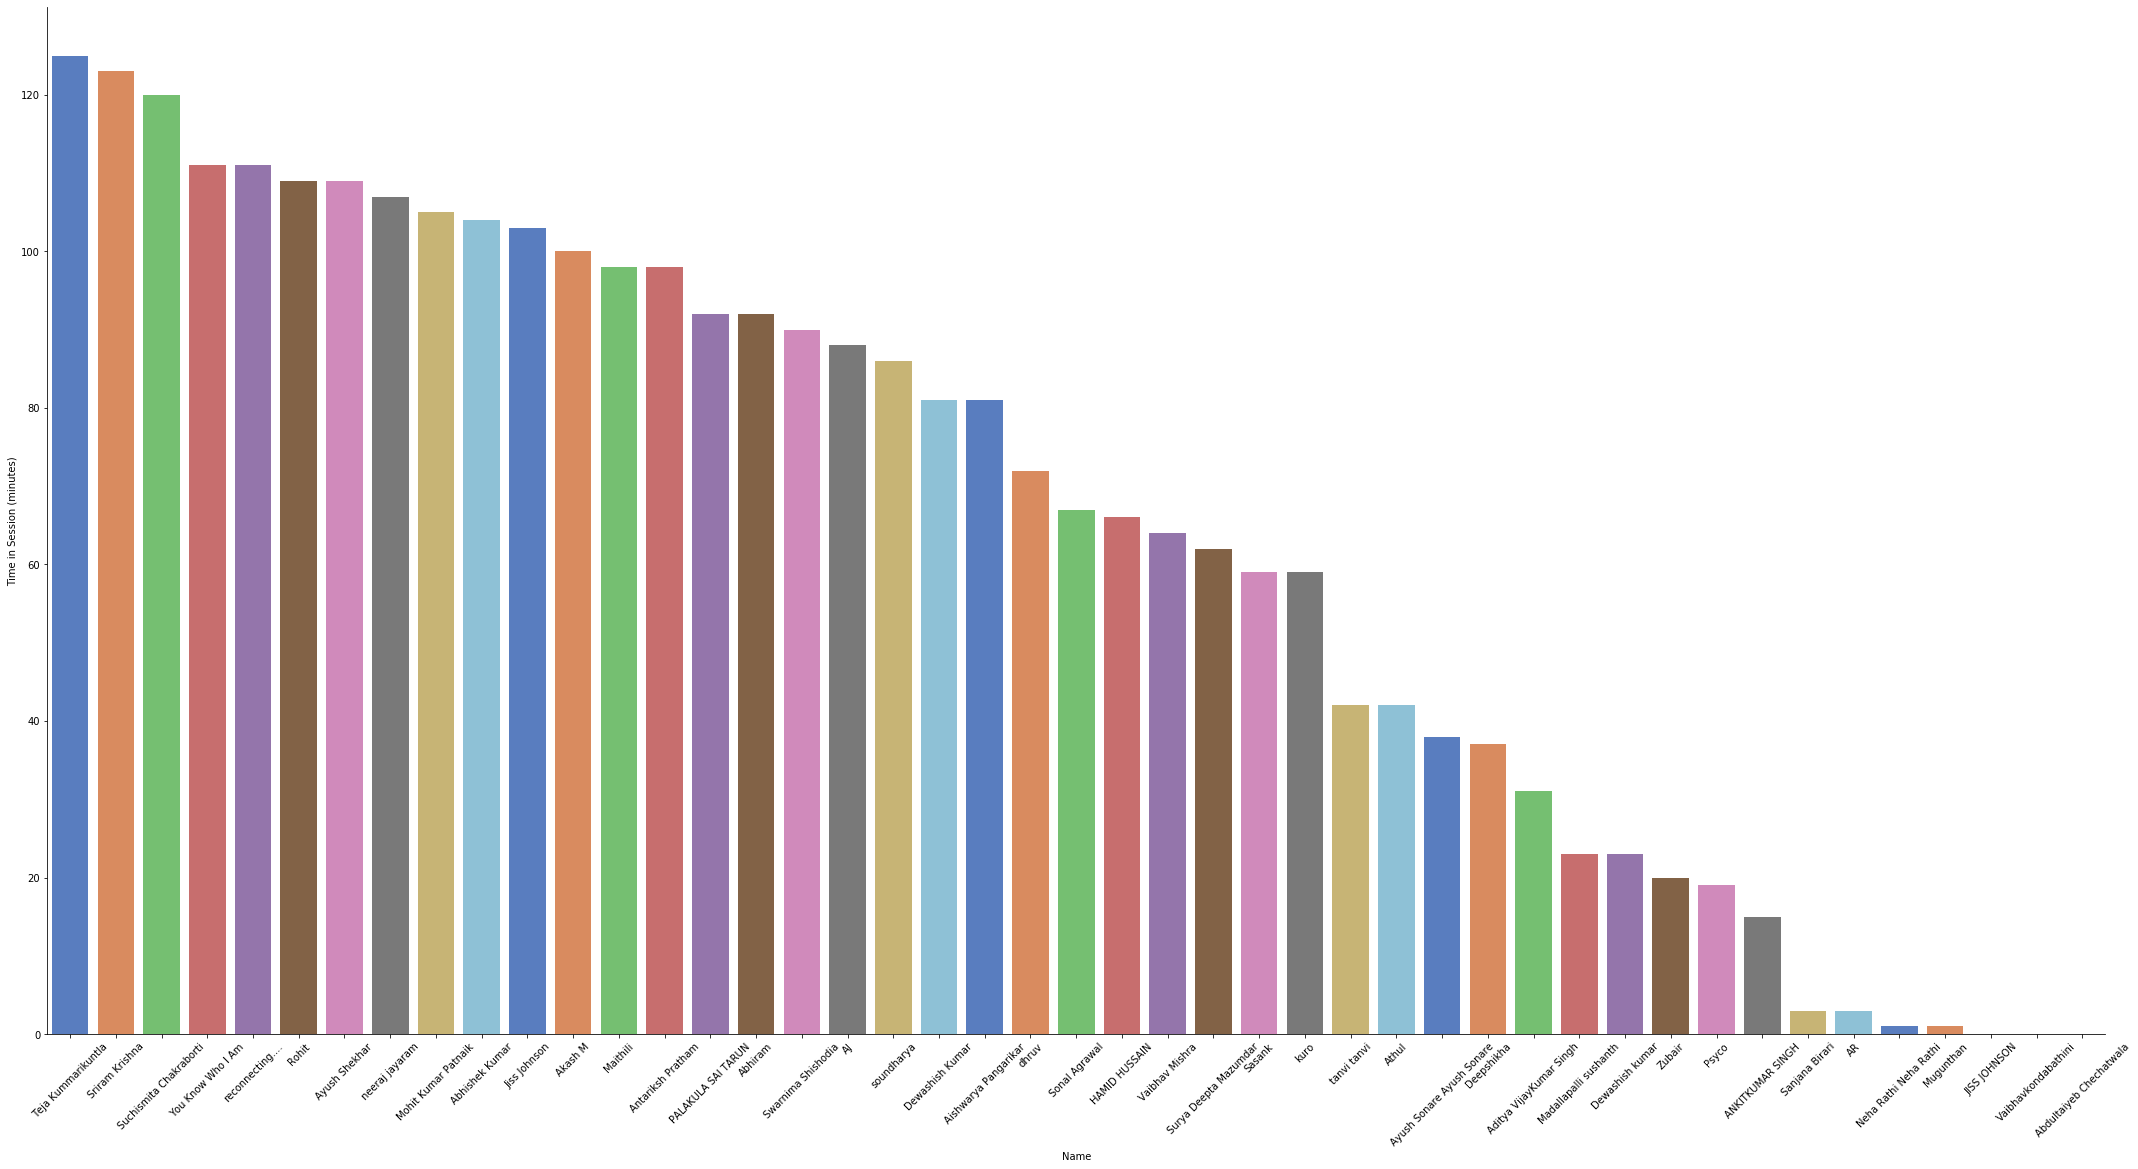

In [83]:
sns.factorplot(x="Name", y="Time in Session (minutes)", 
               data=atten_group_df, kind="bar", 
               size = 15, aspect=2,
               palette = "muted")

# for value in plot:
#     height = value.get_height()
#     plt.text(value.get_x() + value.get_width()/2.,
#              1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.xticks(rotation=45);

**Individual time spent analysis of attendes**

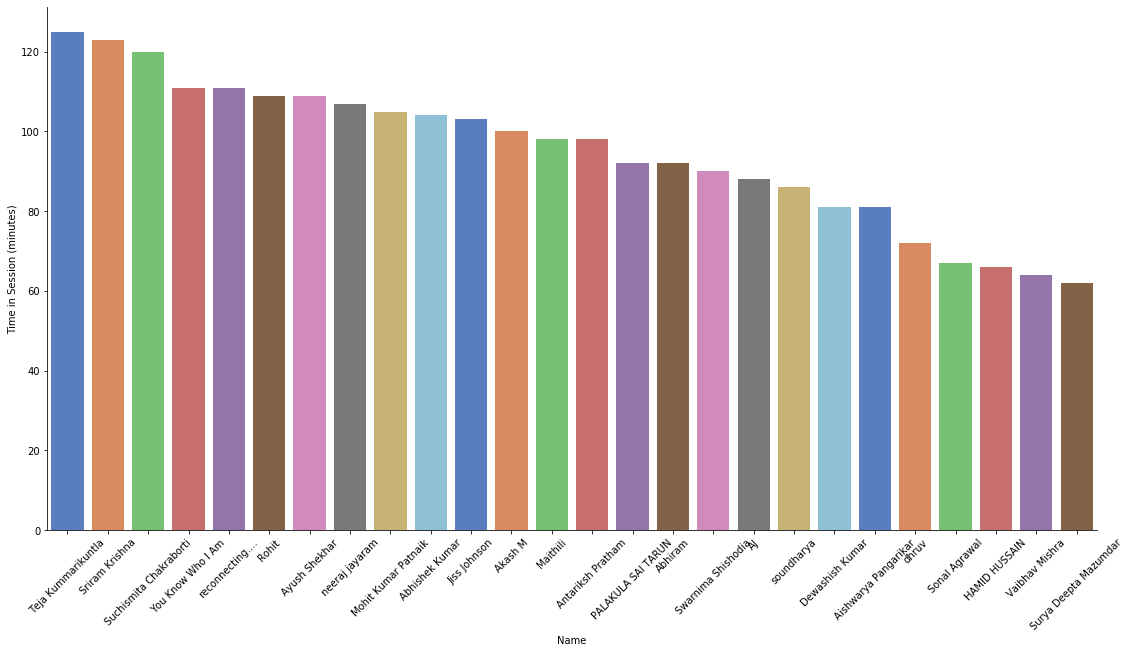

In [76]:
sns.factorplot(x="Name", y="Time in Session (minutes)", 
               data=atten_group_df[atten_group_df["Time in Session (minutes)"] >= SESSION_DURATION//2], 
               kind="bar", 
               size = 8, aspect=2,
               palette = "muted")

plt.xticks(rotation=45);

In [77]:
atten_group_df[atten_group_df["Time in Session (minutes)"] >= SESSION_DURATION//2][['Name', 'Time in Session (minutes)']].set_index('Name')

Time in Session (minutes)
Name                                             
Teja Kummarikuntla                            125
Sriram Krishna                                123
Suchismita Chakraborti                        120
You Know Who I Am                             111
reconnecting....                              111
Rohit                                         109
Ayush Shekhar                                 109
neeraj jayaram                                107
Mohit Kumar Patnaik                           105
Abhishek Kumar                                104
Jiss Johnson                                  103
Akash M                                       100
Maithili                                       98
Antariksh Pratham                              98
PALAKULA SAI TARUN                             92
Abhiram                                        92
Swarnima Shishodia                             90
AJ                                             88
soundharya                                     86
Dewashish Kumar                                81
Aishwarya Pangarikar                           81
dhruv                                          72
Sonal Agrawal                                  67
HAMID HUSSAIN                                  66
Vaibhav Mishra                                 64
Surya Deepta Mazumdar                          62

In [78]:
atten_group_df

Name  Time in Session (minutes)
34         Teja Kummarikuntla                        125
30             Sriram Krishna                        123
31     Suchismita Chakraborti                        120
37          You Know Who I Am                        111
42           reconnecting....                        111
26                      Rohit                        109
11              Ayush Shekhar                        109
41             neeraj jayaram                        107
21        Mohit Kumar Patnaik                        105
5              Abhishek Kumar                        104
18               Jiss Johnson                        103
8                     Akash M                        100
20                   Maithili                         98
9           Antariksh Pratham                         98
24         PALAKULA SAI TARUN                         92
4                     Abhiram                         92
33         Swarnima Shishodia                         90
0                          AJ                         88
43                 soundharya                         86
14            Dewashish Kumar                         81
7        Aishwarya Pangarikar                         81
39                      dhruv                         72
29              Sonal Agrawal                         67
16              HAMID HUSSAIN                         66
35             Vaibhav Mishra                         64
32      Surya Deepta Mazumdar                         62
28                     Sasank                         59
40                       kuro                         59
44                tanvi tanvi                         42
10                      Athul                         42
12  Ayush Sonare Ayush Sonare                         38
13                 Deepshikha                         37
6     Aditya VijayKumar Singh                         31
19      Madallapalli sushanth                         23
15            Dewashish kumar                         23
38                     Zubair                         20
25                      Psyco                         19
1            ANKITKUMAR SINGH                         15
27             Sanjana Birari                          3
2                          AR                          3
23      Neha Rathi Neha Rathi                          1
22                  Mugunthan                          1
17               JISS JOHNSON                          0
36        Vaibhavkondabathini                          0
3     Abdultaiyeb Chechatwala                          0

In [79]:
len(atten_group_df[atten_group_df["Time in Session (minutes)"] >= SESSION_DURATION//2].set_index('Name')['Time in Session (minutes)'])

26

In [85]:
registerd_attendes_ratio = (ATTENDEES_COUNT/REG_COUNT) * 100
print("Percentage of Students registered and attended the session {}".format(registerd_attendes_ratio))

Percentage of Students registered and attended the session 61.64383561643836


## Summary [Report]

**Registration Data Analysis**
- Name of the Event: **Developer 101 | A Step Forward with Flutter**
- No of registrations: **73**
- Registration Count with Batch filter
    - 2022 : 27
    - 2021 : 22
    - 2023 : 13
    - Professional : 11
- No of registrations **With out** prior knowledge on web/app Development : 50 [68.4931506849315%]
- No of registrations **With** prior knowledge on web/app Development : 23 [31.506849315068493%]
- No of registrations who are Beginners in Dart Programming language : 61
- No of registrations who are Beginners in Dart Programming language : 12
- Registrations wish to use Flutter for 
    - Mobile app development                                                |  38
    - Web app development                                                   |  13
    - Mobile app development, Web app development, Desktop app development  |  12
    - Mobile app development, Web app development                           |   9
    - Mobile app development, Desktop app development                       |   1

**Webinar Attendes Data Analysis**
- No of Attendees: 45
- No of students spent more than half in the session: 27
- ***Percentage of Students registered and attended the session 61.64383561643836%***
- Students spent more than 55 minutes in the session 
        Teja Kummarikuntla
        Sriram Krishna	
        Suchismita Chakraborti	
        You Know Who I Am	
        reconnecting....	
        Rohit	
        Ayush Shekhar	
        neeraj jayaram	
        Mohit Kumar Patnaik
        Abhishek Kumar	
        Jiss Johnson	
        Akash M	
        Maithili
        Antariksh Pratham	
        PALAKULA SAI TARUN	
        Abhiram	
        Swarnima Shishodia	
        AJ	
        soundharya	
        Dewashish Kumar
        Aishwarya Pangarikar
        dhruv	
        Sonal Agrawal
        HAMID HUSSAIN
        Vaibhav Mishra
        Surya Deepta Mazumdar	